<a href="https://colab.research.google.com/github/q-rai/VisWorkshop/blob/main/2024_SimBuild_Vis_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Picture is Worth a Thousand Data Points: Introduction to Visualization
## by Andy Berres

This notebook is intended for the hands-on portion of my workshop "A Picture is Worth a Thousand Data Points: Introduction to Visualization" at SimBuild 2024.

### QR Code for the [Github Repository](https://github.com/q-rai/VisWorkshop/)


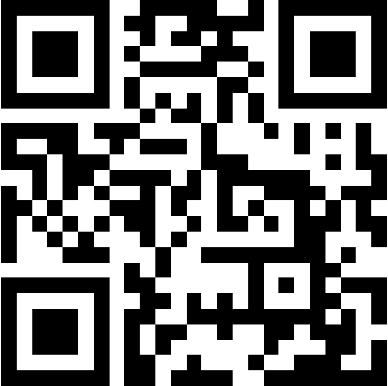


## Setup

Make local installs and download some needed files

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

!curl -s -o setup.sh https://raw.githubusercontent.com/q-rai/VisWorkshop/main/setup.sh
!bash setup.sh

## Raw Data
Let's see what the data looks like

### Reading CSV Data in Python/Pandas
Pandas makes this very easy. The file `Data/table.csv` was downloaded by the setup script above.

In [ ]:
# read data and put it in a dataframe
df = pd.read_csv('Data/table.csv')
print(df)

### Simple Statistics

I wonder if the statistical properties are of any use...
Pandas has the `DataFrame.describe()` function which provides various statistical properties.

In [ ]:
df.describe()

That wasn't very helpful either. Looking at the numbers, I still have no idea what this could be. So let's try plotting it.

### Simple Plots in Pandas
Pandas has some handy plotting functions.

In [ ]:
df.plot()

Well, that wasn't very helpful. Let's try to be more specific.

### Scatter Plots in Pandas
Pandas lets you specify plot types. You can find all the supported plot types in their [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html). Under the hood, it's all `matplotlib` so you can use the `matplotlib` settings to modify your plot.

In [ ]:
df.plot(x='x', y='y', kind='scatter')

Much better, isn't it?

### Let's look at some more interesting data
We'll be using Seaborn. It's based on Matplotlib, and it makes plotting easy (especially for pandas dataframes).
Seaborn brings a bunch of test datasets you can play with. You can get a full list using `sns.get_dataset_names()`.

In [ ]:
cars = sns.load_dataset('mpg')
print(cars)

#### Simple scatter plot

In [ ]:
sns.scatterplot(data=cars, x='horsepower', y='mpg')

### Change some colors

#### By origin
Origin is a discrete category, so we're using a categorical colormap. Seaborn will do this for you automatically.

In [ ]:
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='origin')


#### By model year


In [ ]:
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='model_year')


#### Try a different colormap

Seaborn has different colormap (or color palette) options. You can see them here: https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
sns.set(style='white')
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis')

#### Change background
Options include `white` (blank background), `dark`, `whitegrid`, and `darkgrid`. Go ahead and try these out to see which one you like best.

In [ ]:
sns.set(style='whitegrid')
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis')

#### Change marker sizes

If you have a multidimensional dataset, marker size is another way to get more information about your data into the same plot. This variable should be numerical.

In [ ]:
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis', size='weight', sizes=(5,50))

#### The legend is blocking my view!
You can move it around fairly easily.

In [ ]:
sns.scatterplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis', size='weight', sizes=(5,100))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


#### Split by different variables
You can also make the same plot multiple times for different categorical values. Let's make one scatterplot per region of origin.
One important thing to know about `relplot` is that the x-axis and y-axis will be identical for all plots it makes, to make them comparable.

In [ ]:
sns.relplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis', size='weight', sizes=(5,100), col='origin')


### Plotting options

Depending on what you use your plot for (`paper`, `talk`, `poster`), you may want different label sizes to keep everything legible. For more styling options: https://seaborn.pydata.org/tutorial/aesthetics.html

In [ ]:
sns.set_context("talk")
sns.relplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis', size='weight', sizes=(5,100), col='origin')


In [ ]:
sns.set_context("poster")
sns.relplot(data=cars, x='horsepower', y='mpg', hue='model_year', palette='viridis', size='weight', sizes=(5,100), col='origin')


## More visualization
Seaborn alone has many more plot types. Check out their example gallery here: https://seaborn.pydata.org/examples/index.html